## 8.5 Homework
Write your own program to do the followings
- generate a data with random noise. Explain data, what is the physical meaning? What is the physical model? 

This data set models the calculation of lambda using a diffraction grating d with orders n = 1, 2, 3. Currently in PHYS 413 we are doing an experiment where we are measuring the angles of spectral lines of different elements, so I thought I'd model my PHYS 300 Lecture 8 HW after it. This is not including actual data from my experiment, but this model yields possible polynomial functions that fits the data. 

- choose different polynomial function to fit the data

Here I show 3 different polynomials to fit the data.

- discuss which polynomial function yields the best fit and give your reasoning.

I am inclined to choose the polynomial with the least amount of error, but I'd actually chose the orange polynomial. In this case, the area under the curves below and above zero look like they'd add up to zero, which would best fit our ideal function (listed as the dashed line in the graph).

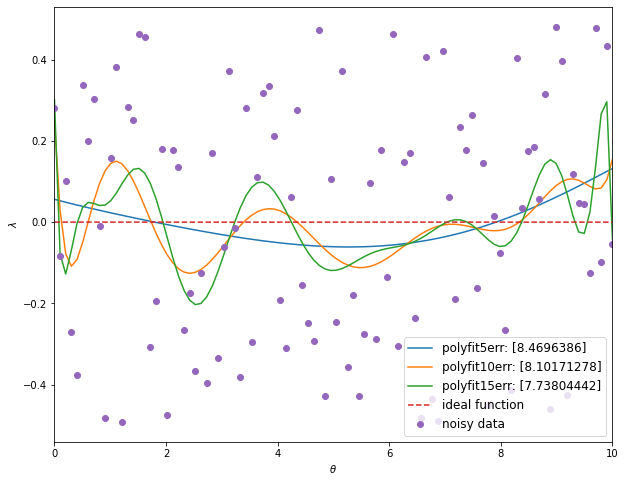

In [4]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[10, 8])

#define the function. This is the diffraction equation to determine wavelength lambda.
f = lambda x,d,n: d*np.sin(x)/n

#define the parameters for the plot
x_min, x_max = 0, 10
npoints = 100
d,n = 1/(6*10**(5)), np.random.randint(1,4,npoints)
order = 10

#d corresponds to slit separation in nm for a diffraction grating of 600lines/mm

x = np.linspace(x_min, x_max, npoints)
y = f(x,d,n) + np.random.rand(npoints) - 0.5

for order in range (5, 20, 5):
    fit = np.polyfit(x, y, order, full=True)
    y_p = np.polyval(fit[0], x)
    plt.plot(x,y_p, label='polyfit'+str(order)+"err: "+str(fit[1]))


plt.plot(x,f(x,d,n), '--', label='ideal function')
plt.plot(x,y, 'o', label='noisy data')

plt.xlabel('$\\theta$')
plt.ylabel('$\lambda$')
plt.xlim([x_min, x_max])
plt.legend(fontsize=12)
plt.show()